In [5]:
import pandas as pd #판다스를 불러온다
import seaborn as sns #그래프를 표현하도록 seaborn을 불러온다 
import matplotlib.pyplot as plt #데이터 시각화 그래프 툴이다

In [6]:
train=pd.read_csv('data_titanic/train.csv',index_col='PassengerId')
train # index는 승객으로 타이타닉 데이터를 불러온다 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
train.head() #처음 다섯 행만 본다 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.shape #데이터 프레임의 크기를 알아본다 

(891, 11)

In [9]:
train['Sex'].value_counts() #Sex열에 있는 값들의 갯수를 출력 

male      577
female    314
Name: Sex, dtype: int64

In [10]:
train['Sex'].groupby(train['Survived']).value_counts() 
#DataFrame에서 ‘Survived’ 열에 따라 그룹화된 ‘Sex’ 열의 값들을 세는 데 사용됩니다

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

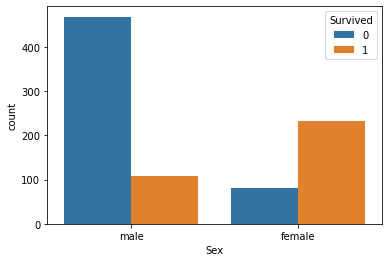

In [11]:
sns.countplot(data=train, x='Sex',hue='Survived')
# Seaborn 라이브러리에서 제공하는 시각화 도구
#생존(1)과 사망(0)의 데이터를 다른 색상의 막대로 표시하여, 
#성별에 따른 생존율을 비교하기 쉽게 만들어 줍니다.

In [12]:
train[['Sex','Survived']]
# 'train’이라는 pandas DataFrame에서 
#'Sex’와 ‘Survived’ 두 열을 선택하여 
#새로운 DataFrame을 만드는 데 사용됩니다

,Sex,Survived
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0
...,...,...
887,male,0
888,female,1
889,female,0


In [13]:
pd.pivot_table(train, index='Sex',values='Survived')
#‘Sex’ 열의 각 값(예: ‘male’, ‘female’)에 대해 ‘
#Survived’ 열의 평균값을 계산하여 출력합니다. 
#이 평균값은 각 성별의 생존율을 나타냅니다. 

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Pclass', ylabel='count'>

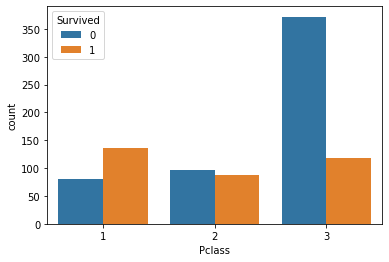

In [14]:
sns.countplot(data=train, x='Pclass',hue='Survived')
# Seaborn 라이브러리를 사용하여 데이터셋의 각 카테고리별로 
#값의 개수를 세어 막대 그래프로 표현
#‘Pclass’ 열의 각 값(예: 1, 2, 3 등급)에 대해 ‘
#Survived’ 열의 값(0 또는 1)에 따라 색이 구분된 
#막대 그래프가 생성됩니다. 이를 통해 각 객실 
#등급별로 생존자와 사망자의 수를 비교할 수 있습니다

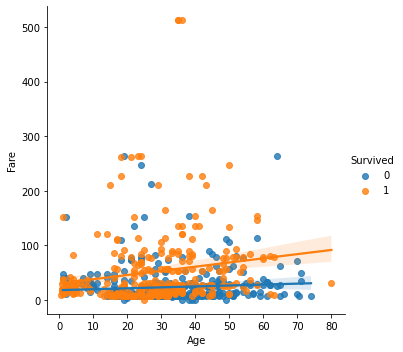

In [15]:
sns.lmplot(data=train,x='Age',y='Fare', hue='Survived',fit_reg=True)
#Seaborn 라이브러리를 사용하여 산점도(scatter plot)와 
#회귀선(regression line)을 함께 그려주는 시각화 도구
#fit_reg=True는  데이터에 가장 잘 맞는 선형 회귀선을 
#그린다

Pre-processing

프로그램 encoding

In [16]:
train['Sex']=='male'
# 'train’이라는 pandas DataFrame의 ‘Sex’ 열에서 값이 
#'male’인 행을 찾기 위한 불리언(Boolean) 조건입니다.

PassengerId
1       True
2      False
3      False
4      False
5       True
       ...  
887     True
888    False
889    False
890     True
891     True
Name: Sex, Length: 891, dtype: bool

In [17]:
train.loc[train['Sex']=='male','Sex_encode']=0
# 'train’이라는 pandas DataFrame에서 ‘
#Sex’ 열의 값이 'male’인 모든 행을 찾아, 
#그 행들의 'Sex_encode’라는 새로운 열에 0을 
#할당하는 작업을 수행합니다.

In [18]:
train.head() #새로운 행을 추가했으니 5행만 출력

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [19]:
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
# 'train’이라는 pandas DataFrame에서 ‘
#Sex’ 열의 값이 'female’인 모든 행을 찾아, 
#그 행들의 'Sex_encode’라는 새로운 열에 1을 할당

In [20]:
train.info() 
# 이 함수를 사용하면 DataFrame에 대한 빠른 
#개요를 얻을 수 있으며, 각 열의 데이터 타입, 비어 있지 
#않은 값의 개수, 메모리 사용량 등을 확인할 수 있습니다

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         714 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Cabin       204 non-null    object 
 10  Embarked    889 non-null    object 
 11  Sex_encode  891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


In [21]:
train.isnull().sum()
# pandas 라이브러리를 사용하여 'train’이라는 DataFrame 
#내의 각 열에서 결측치(null 또는 NaN 값)의 개수를 계산

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Sex_encode      0
dtype: int64

Upload test data

In [22]:
test=pd.read_csv('data_titanic/test.csv', index_col='PassengerId')
#‘data_titanic/test.csv’ 파일을 읽고, ‘
#PassengerId’ 열을 인덱스로 설정하여 
#'test’라는 DataFrame을 생성

In [23]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [24]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
test.shape
# pandas DataFrame의 행과 열의 수를 
#나타내는 튜플을 반환

(418, 10)

In [26]:
test["Sex"] == 'male'
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1
test[["Sex", "Sex_encode"]].head()

# 'test’라는 pandas DataFrame에서 
#성별을 숫자로 인코딩하는 과정을 보여줍니다. 
#'Sex’ 열의 값이 'male’인 경우 ‘Sex_encode’ 
#열에 0을, 'female’인 경우에는 1을 할당합니다. 

,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


Learning(Decision-tree)

1.feature 선택

2.예측결과를 정답과 비교하며 학습

3.의사결정트리 생성 

In [27]:
label_name = "Survived"
feature_names = ["Pclass", "Sex_encode"]

#머신러닝 모델에서 예측하고자 하는 타겟 변수가 
#"Survived"이며, 모델이 학습에 
#사용할 특성들이 'Pclass’와 'Sex_encode’임을 의미

In [28]:
label_name

'Survived'

In [29]:
feature_names

['Pclass', 'Sex_encode']

In [30]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [31]:
X_train = train[feature_names]
X_train.head()
# 'Pclass’와 ‘Sex_encode’ 
#열만 포함하는 새로운 DataFrame인 
#X_train의 첫 5행이 출력됩니다.


,Pclass,Sex_encode
PassengerId,,
1,3,0.0
2,1,1.0
3,3,1.0
4,1,1.0
5,3,0.0


In [32]:
X_test = test[feature_names]
X_test.tail()
#'Pclass’와 ‘Sex_encode’ 열만 
#포함하는 새로운 DataFrame인 X_test의 
#마지막 5행이 출력됩니다

,Pclass,Sex_encode
PassengerId,,
1305,3,0.0
1306,1,1.0
1307,3,0.0
1308,3,0.0
1309,3,0.0


In [33]:
y_train = train[label_name]
y_train.head()

# ‘Survived’ 열만 포함하는 새로운 
#시리즈인 y_train의 첫 5행이 출력됩니다.
#이 시리즈는 머신러닝 모델의 타겟 변수로 사용될 것

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [34]:
X_test = test[feature_names]
X_test.tail()

# 'Pclass’와 ‘Sex_encode’ 열을 
#사용하여 X_test라는 새로운 DataFrame을 생성하고, 
#tail() 함수를 사용하여 하위 5행을 확인하는 과정

,Pclass,Sex_encode
PassengerId,,
1305,3,0.0
1306,1,1.0
1307,3,0.0
1308,3,0.0
1309,3,0.0


In [35]:
y_train = train[label_name]
y_train.head()
#‘train’ DataFrame에서 타겟 변수인 
#“Survived” 열을 선택하여 저장하는 과정입니다

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

Machine Learning: scikit-learn

참고: 머신러닝-결정트리(Decision Tree)

In [36]:
from sklearn.tree import DecisionTreeClassifier
#scikit-learn 라이브러리에서 제공하는 결정 트리 
#기반의 분류 알고리즘을 구현한 클래스입니다.

In [37]:
model = DecisionTreeClassifier(max_depth = 10, random_state = 0)
model

# DecisionTreeClassifier 모델은 
#최대 깊이(max_depth)를 10으로 설정하고, 
#재현 가능한 결과를 위해 난수 생성기의 
#시드(random_state)를 0으로 설정
#max_depth 는 트리의 최대 깊이를 지정합니다

DecisionTreeClassifier(max_depth=10, random_state=0)

fit: learning by model

In [38]:
model.fit(X_train, y_train)
#X_train에 있는 특성을 
#기반으로 y_train의 레이블을 예측하는 방법을 학습합니다

DecisionTreeClassifier(max_depth=10, random_state=0)

In [39]:
model.score(X_train, y_train)
# X_train에 있는 데이터를 사용하여 
#예측을 수행하고, 예측된 결과와 y_train에 
#있는 실제 레이블을 비교하여 정확도(accuracy)를 
#계산합니다.

0.7867564534231201

(라이브러리 Graphviz 설치방법)

In [40]:
#!pip install graphviz

In [41]:
from sklearn.tree import export_graphviz
import graphviz
#export_graphviz 함수와 graphviz 
#라이브러리를 사용하면, 학습된 결정 
#트리 모델을 시각화하여 트리 구조를 확인할 수 있습니다

In [42]:
feature_names

['Pclass', 'Sex_encode']

In [43]:
export_graphviz(model,
                feature_names=feature_names,
                class_names=['Unsurvived','Survived'],
                out_file="data_titanic/decision-tree.dot")
#export_graphviz 함수는 sklearn.tree 모듈에 있는 함수로, 
#결정 트리를 시각화하기 위해 사용됩니다

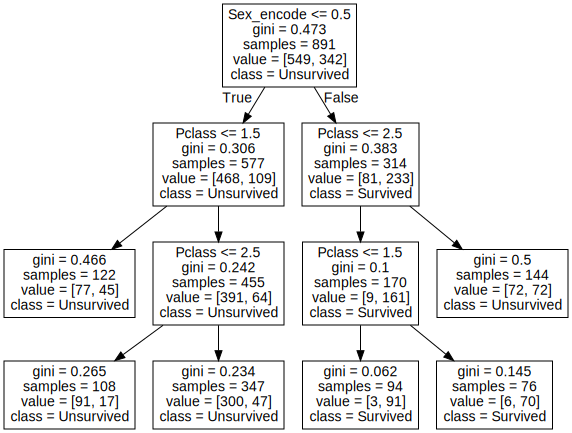

In [44]:
with open("data_titanic/decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

#graphviz.Source 함수는 DOT 소스 코드를 Source 
#객체로 변환하고, 이를 시각화하기 위한 준비를 합니다

In [45]:
model.predict(X_test) 
#model.predict(X_test)는 훈련된 모델을 
#사용하여 X_test 데이터 세트에 대한 
#예측을 수행하는 코드

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
predictions = model.predict(X_test) 
#코드는 훈련된 머신러닝 모델인 model을 사용하여 
#테스트 데이터 세트 X_test에 대한 예측값을 계산합니다

In [47]:
len(predictions)
# predictions 배열의 길이, 
#즉 테스트 데이터 세트 X_test에 대한 예측값의 
#총 개수를 반환합니다

418

In [48]:
X_test

,Pclass,Sex_encode
PassengerId,,
892,3,0.0
893,3,1.0
894,2,0.0
895,3,0.0
896,3,1.0
...,...,...
1305,3,0.0
1306,1,1.0
1307,3,0.0


In [49]:
submission = pd.read_csv("data_titanic/gender_submission.csv", index_col="PassengerId")
submission.head()

#gender_submission.csv 파일을 pandas 라이브러리를 
#사용하여 읽고, ‘PassengerId’ 열을 인덱스로 설정하여 
#DataFrame을 생성합니다. 

,Survived
PassengerId,
892,1
893,0
894,1
895,1
896,0


In [50]:
submission["Survived"] = predictions
submission.head()

#predictions 배열에 저장된 예측 결과를 
#submission DataFrame의 ‘Survived’ 열에 할당합니다. 

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [51]:
submission.to_csv("data_titanic/submission_test.csv")
#submission DataFrame을 ‘submission_test.csv’ 파일로 
#저장 data_titanic’ 폴더에 ‘submission_test.csv’ 
#파일이 생성

캐글제출